In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

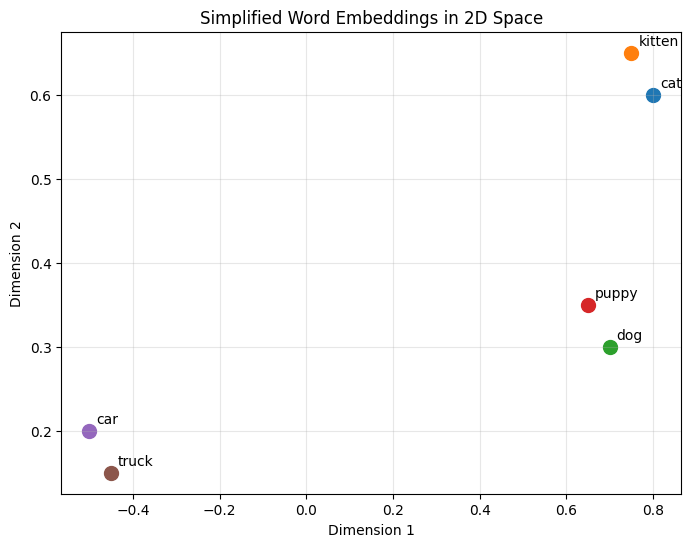

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.show()

To know how similar those are we use 
## Cosine Similarity 



In [5]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


## Embedding Model Creation

In [7]:
from langchain_huggingface import HuggingFaceEmbeddings

# Intializing a simple Hugging face model without any api key
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [8]:
# Embedding creation
text = "Reinforcement learning is a great field of research and development and is active"
embedding = embeddings.embed_query(text)

print("length : ",len(embedding))
print(embedding)

length :  384
[-0.07399701327085495, -0.03258278965950012, -0.02197709120810032, -0.008223455399274826, -0.057193923741579056, 0.02664361707866192, 0.004279437009245157, 0.011675508692860603, 0.02632821723818779, 0.09044638276100159, -0.048813432455062866, 0.07354619354009628, 0.032172080129384995, 0.04280821606516838, 0.03842625766992569, 0.06939387321472168, -0.0034222498070448637, -0.019964639097452164, -0.03707093000411987, -0.14214760065078735, 0.0010977770434692502, -0.013960449025034904, 0.10050719976425171, -0.017058493569493294, -0.07213373482227325, 0.014089679345488548, 0.01417030580341816, -0.008709052577614784, 0.03518981859087944, 0.0271289125084877, -0.007138052023947239, 0.0014548765029758215, 0.051393527537584305, -0.110445037484169, -0.11721590161323547, 0.05586469918489456, -0.10877788066864014, -0.023590322583913803, -0.00039460143307223916, 0.01962667889893055, -0.060648612678050995, 0.027539337053894997, 0.03422774001955986, -0.06509065628051758, 0.081815212965011

In [9]:
sentences = [
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[2])
print(embedding_sentence[3])

[-0.057308219373226166, 0.012835615314543247, -0.03422994911670685, 0.023673349991440773, -0.01728805899620056, -0.1694202572107315, 0.03742196783423424, 0.0802406519651413, -0.019475188106298447, 0.03225823864340782, -0.05816471204161644, 0.02852601930499077, 0.06679011136293411, 0.041788920760154724, 0.05896139517426491, -0.028756659477949142, -0.093843974173069, -0.0037644661497324705, 0.03511255607008934, -0.1364700198173523, -0.0958661288022995, 0.042980484664440155, -0.010301606729626656, 0.005191202275454998, 0.017639758065342903, -0.014539487659931183, 0.011575614102184772, -0.0200577974319458, -0.014882039278745651, -0.057195547968149185, -0.07225403934717178, 0.10563814640045166, 0.04824921116232872, 0.03698636218905449, 0.004924638196825981, 0.056275755167007446, 0.03693477436900139, -0.0601443350315094, -0.024707164615392685, 0.035386279225349426, -0.05064718425273895, 0.04535139352083206, -0.011765529401600361, -0.06097251921892166, -0.033517710864543915, -0.02142089232802

In [13]:
cosine_similarity(embedding_sentence[2],embedding_sentence[3])

np.float64(0.8773668110752418)

## Some popular Embedding models on huggingface

In [14]:
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}